In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import googlemaps

map = "City_of_Pittsburgh_Neighborhoods.shp"

data = gpd.read_file(map).to_crs("EPSG:4326")

def get_neighborhood(lat, lon):
    point = Point(lon, lat)  
    for col, row in data.iterrows():
        if row['geometry'].contains(point):
            return row['HOOD'] 
    return "Neighborhood not found"

key = input("Enter your Google API key: ")
gmaps = googlemaps.Client(key=key)

def getLatLon(address):
    geocode_result = gmaps.geocode(address)
    if geocode_result:
        location = geocode_result[0]['geometry']['location']
        lat = location['lat']
        lon = location['lng']
        return lat, lon
    else:
        return None, None

In [19]:
import csv
Neighborhoods = {}
with open("blockParty.csv", "r") as pogos:
    reader = csv.reader(pogos)
    next(reader)
    for row in reader:
        coordinates = getLatLon(row[3] + " pittsburgh, pa")
        neighborhood = get_neighborhood(coordinates[0], coordinates[1])
        if neighborhood in Neighborhoods:
            Neighborhoods[neighborhood] += 1
        else:
            Neighborhoods[neighborhood] = 1

#print(Neighborhoods) 

MaxScore = max(Neighborhoods.values())
DaHood = []
partyScore = []

for hood in Neighborhoods:
    DaHood.append(hood)
    partyScore.append((Neighborhoods[hood]/MaxScore)*100) 


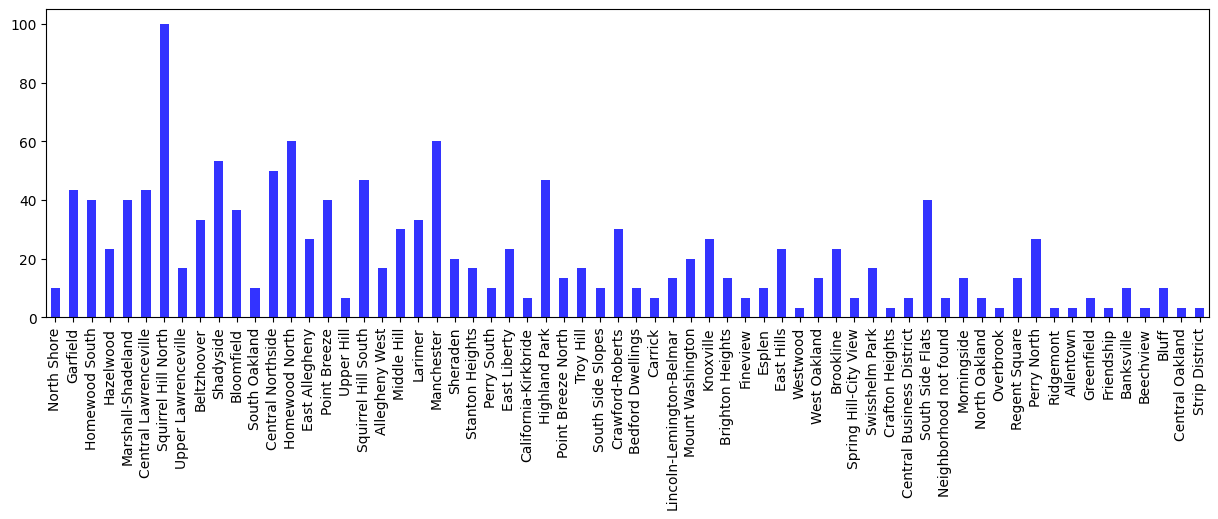

In [24]:
import pandas as pd


df = pd.Series(partyScore, index = DaHood).plot.bar(alpha = 0.8, color = 'blue', figsize = (15, 4))